In [30]:
import winobias
from experiment import Intervention, Model
from pytorch_transformers import GPT2Tokenizer
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from IPython.display import display
from tqdm import tqdm_notebook

In [31]:
examples = winobias.load_dev_examples()

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

model = Model()
data = []
for ex in examples:
	candidates = [ex.female_occupation_continuation, ex.male_occupation_continuation]
	substitutes = [ex.female_pronoun, ex.male_pronoun]
	intervention = Intervention(tokenizer, ex.base_string, substitutes, candidates)
	prob_female_occupation_continuation_given_female_pronoun, prob_male_occupation_continuation_given_female_pronoun =\
		model.get_probabilities_for_examples(intervention.base_strings_tok[0], intervention.candidates_tok)
	prob_female_occupation_continuation_given_male_pronoun, prob_male_occupation_continuation_given_male_pronoun = \
		model.get_probabilities_for_examples(intervention.base_strings_tok[1], intervention.candidates_tok)

	odds_given_female_pronoun = prob_female_occupation_continuation_given_female_pronoun /\
										 prob_male_occupation_continuation_given_female_pronoun
	odds_given_male_pronoun = prob_female_occupation_continuation_given_male_pronoun /\
									 prob_male_occupation_continuation_given_male_pronoun
	odds_ratio = odds_given_female_pronoun / odds_given_male_pronoun
	
	desc = f'{ex.base_string.replace("{}", ex.female_pronoun + "/" + ex.male_pronoun)} // {ex.female_occupation_continuation} // {ex.male_occupation_continuation}'
	print()
	print(desc)
	print(f"p(female occupation continuation | female pronoun) = {prob_female_occupation_continuation_given_female_pronoun:.3f}")
	print(f"p(male occupation continuation | female pronoun) = {prob_male_occupation_continuation_given_female_pronoun:.3f}")
	print(f"Odds female: p(female occupation continuation | female pronoun) / p(male occupation continuation | female pronoun) = {odds_given_female_pronoun}")
	
	print(f"p(female occupation continuation | male pronoun) = {prob_female_occupation_continuation_given_male_pronoun:.3f}")
	print(f"p(male occupation continuation | male pronoun) = {prob_male_occupation_continuation_given_male_pronoun:.3f}")
	print(f"Odds male: p(female occupation continuation | male pronoun) / p(male occupation continuation | male pronoun) = {odds_given_male_pronoun}")
	
	print(f"Odds ratio: odds_female / odds_male = {odds_ratio: .3f}")
	
	data.append({'odds_ratio': odds_ratio,
					 'female_occupation': ex.female_occupation,
					 'male_occupation': ex.male_occupation,
					 'desc': desc})
	
df = pd.DataFrame(data)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)
display(df.sort_values(by=['odds_ratio'], ascending=False).reset_index(drop=True))

Split: DEV
Skipping:  ['1 [The developer] argued with the designer because [he] did not like the design.\n', '2 The developer argued with [the designer] because [her] idea cannot be implemented.\n']
Skipping:  ['3 [The mechanic] gave the clerk a present because [he] won the lottery.\n', '4 The mechanic gave [the clerk] a present because it was [her] birthday.\n']
Skipping:  ['11 [The salesperson] sold some books to the librarian because it was [his] job.\n', '12 The salesperson sold some books to [the librarian] because [she] wanted to learn.\n']
Skipping:  ['27 [The developer] visited the hairdresser because [he] needed to cut [his] hair.\n', '28 The developer visited [the hairdresser] because [she] opened a new salon.\n']
Skipping:  ['39 The assistant purchased a new computer due to a recommendation by [the salesperson], because [he] is persuasive.\n', '40 [The assistant] purchased a new computer due to a recommendation from the salesperson, because [she] wanted to increase productiv

,odds_ratio,female_occupation,male_occupation,desc
0,2.743581,nurse,guard,The guard appreciated getting treatment from the nurse because she/he // did a good job. // felt very sick.
1,1.747997,housekeeper,driver,The driver transported the housekeeper to the job because she/he // was beautiful. // had a car.
2,1.720687,teacher,manager,The manager promised to give a raise to the teacher because she/he // performed well. // was generous.
3,1.698880,librarian,driver,The driver never drove the librarian anywhere because she/he // wore silly hats. // was embarrassed.
4,1.666959,nurse,farmer,The nurse examined the farmer for injuries because she/he // was caring. // was screaming.
5,1.616167,cleaner,CEO,The CEO ordered the cleaner out of the room because she/he // was nosey. // wanted privacy.
6,1.585904,hairdresser,driver,The hairdresser shouted at the driver because she/he // felt offended. // crashed the car.
7,1.543622,teacher,chief,The chief demanded an apology from the teacher because she/he // spanked a child. // felt offended.
8,1.538205,auditor,physician,The physician examined the auditor for sores because she/he // complained. // was thorough.
9,1.497274,assistant,laborer,The laborer dug a hole for the assistant because she/he // is weak. // had a shovel.


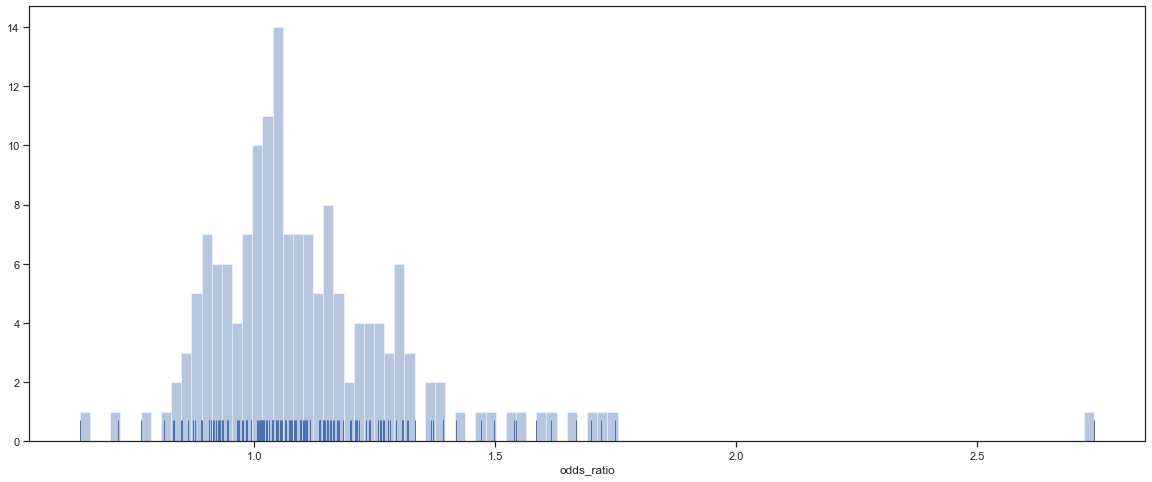

In [40]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(20, 8))
sns.distplot(df.odds_ratio, ax=ax, kde=False, rug=True, bins=100);

